In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# a) Find Shape of Data
df.shape

(303, 15)

In [5]:
# b) Find Missing Values
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [6]:
df.count()

Unnamed: 0    303
Age           303
Sex           303
ChestPain     303
RestBP        303
Chol          303
Fbs           303
RestECG       303
MaxHR         303
ExAng         303
Oldpeak       303
Slope         303
Ca            299
Thal          301
AHD           303
dtype: int64

In [7]:
# c) Find data type of each column
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [8]:
# d) Finding out Zero's
(df == 0).sum()

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

In [9]:
# e) Find Mean age of patients
np.mean(df['Age'])

54.43894389438944

In [10]:
# f) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training (75%) and testing (25%).
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [11]:
data = df[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']]

In [12]:
train,test = train_test_split(data,test_size=0.25,random_state=1)

In [13]:
train.shape

(227, 5)

In [14]:
test.shape

(76, 5)

Through the diagnosis test 100 reports were predicted as COVID positive, but only 45 of those were actually positive. Total 50 people in the sample were actually COVID positive. There were a total of 500 samples. Create confusion matrix based on above data and find
I. Accuracy
II. Precision
III. Recall
IV. F-1 score

Confusion Matrix:
[[395  55]
 [  5  45]]

Metrics:
Accuracy: 0.88
Precision: 0.45
Recall: 0.90
F1-Score: 0.60


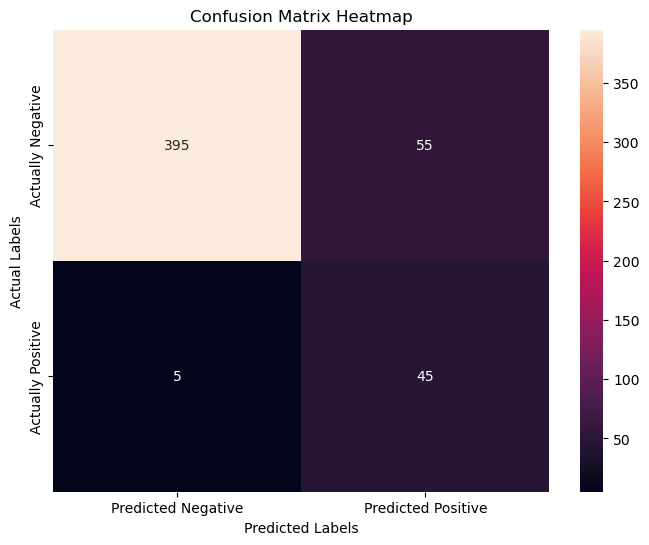

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Given data
total_samples = 500
true_positives = 45  # Predicted positive and actually positive
false_positives = 100 - 45  # Predicted positive but actually negative
false_negatives = 50 - 45  # Actually positive but predicted negative
true_negatives = total_samples - (true_positives + false_positives + false_negatives)

# Create dataset array
# Each row represents a sample in the form [actual_label, predicted_label]
data = np.array([
    [1, 1] if i < 45 else           # True Positives (45 samples)
    [1, 0] if i < 50 else           # False Negatives (5 samples)
    [0, 1] if i < 105 else          # False Positives (55 samples)
    [0, 0]                          # True Negatives (395 samples)
    for i in range(500)
])

# Separate actual and predicted labels
actual_labels = data[:, 0]
predicted_labels = data[:, 1]

# Compute confusion matrix using sklearn
cm = confusion_matrix(actual_labels, predicted_labels)

# Compute metrics
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

# Display metrics
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualize confusion matrix
categories = ['Actually Negative', 'Actually Positive']
labels = ['Predicted Negative', 'Predicted Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=categories)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
